In [1]:
!pip install gdal
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 38.4 MB/s eta 0:00:00


In [11]:
!pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 5.4 MB/s eta 0:00:00


** TIFF FILE**

In [12]:
import tifffile as tif
import matplotlib.pyplot as plt
from spectral import imshow


In [4]:
img = tif.imread('/content/L71221071_07120010720_DN.tif')

In [5]:
img.shape

(1233, 1520, 6)

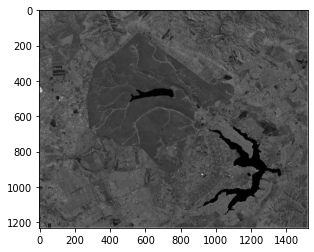

In [10]:
plt.imshow(img[:,:,3], cmap='Greys_r')

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

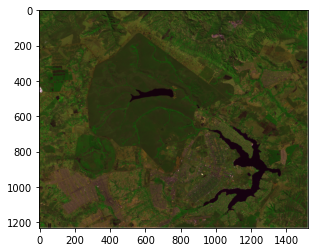

In [16]:
imshow(img, bands=(2,3,0))

**GDAL**


In [39]:
from osgeo import gdal
import numpy as np

In [20]:
img2 = gdal.Open('/content/L71221071_07120010720_DN.tif')

In [21]:
print(img2)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f33d1fb9e10> >


In [22]:
imshow(img2)

AttributeError: ignored

In [23]:
img3 = img2.ReadAsArray()

In [25]:
img3.shape

(6, 1233, 1520)

In [31]:
img3 = img3.swapaxes(0,1)

In [32]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [12.0, 255.0]
    G: [12.0, 255.0]
    B: [12.0, 255.0]

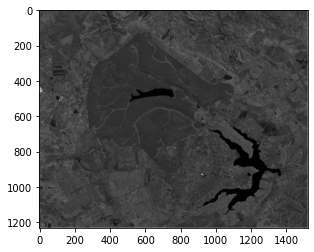

In [33]:
imshow(img3[:,:,3])

In [38]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

In [40]:
stack = np.dstack([b1,b2,b4])

In [41]:
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

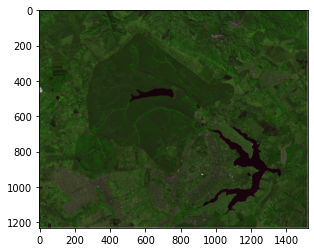

In [43]:
imshow(stack, (1,2,0))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [40.0, 255.0]
    B: [40.0, 255.0]

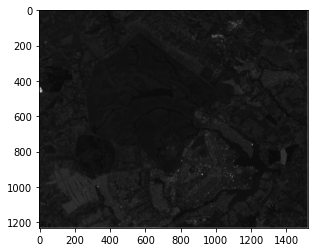

In [37]:
imshow(b1)

RASTERIO

In [48]:
import rasterio
from rasterio.plot import show 

In [46]:
rst = rasterio.open('/content/L71221071_07120010720_DN.tif')

In [47]:
print (rst)

<open DatasetReader name='/content/L71221071_07120010720_DN.tif' mode='r'>


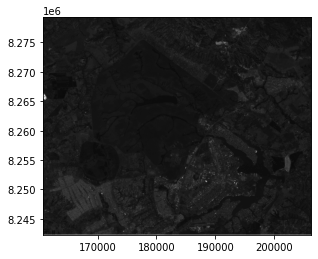

In [50]:
show (rst, cmap='Greys_r')

In [53]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [54]:
stack = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

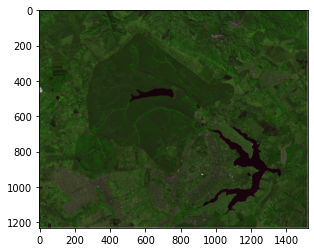

In [55]:
imshow(stack, (1,2,0))

In [57]:
with rasterio.open('/content/L71221071_07120010720_DN.tif') as rst:
  b1 = rst.read(1)
  b2 = rst.read(2)
  b4 = rst.read(4)

  stack2 = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

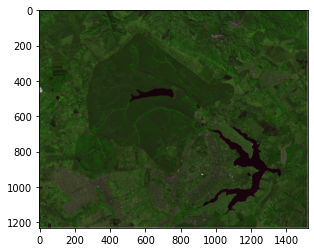

In [58]:
imshow(stack2, (1,2,0))